In [1]:
#Se crea una estructura de un dataframe para cargar los datos
import pandas as pd   
# Permite cargar el modelo logistica de regresión
from sklearn.linear_model import LogisticRegression 

In [2]:
#se define un data frame para cargar el archivo que contiene los datos de entrenamiento
dfHeart = pd.read_csv("/UCordoba/Machine Learning/Data/Heart Attack.csv")
#se muestra el dataframe
dfHeart.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


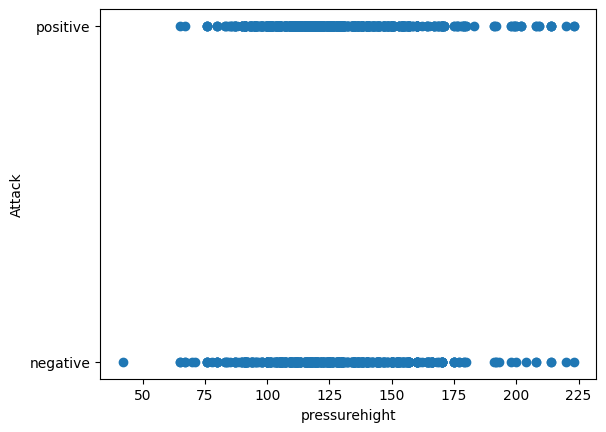

In [8]:
#Se visualiza en una gráfico de dispersión presencia de arañas y tamaño de los granos de arena
import matplotlib.pyplot as plott
%matplotlib inline
plott.ylabel('Attack')
plott.xlabel('pressurehight')
plott.scatter(dfHeart['pressurehight'],dfHeart['class'])

In [9]:
#Se reemplazará el valor de las especies de flores, donde 0 corresponde a setosa, 1 a virginica y 2 a versicolor
dfHeart=dfHeart.replace(to_replace ="negative", value ="0")
dfHeart=dfHeart.replace(to_replace ="positive", value ="1")

In [10]:
#Se elimina los espacios al principio y al final de la cadena:
#en el eventual caso de que los hubiera
dfHeart.columns=dfHeart.columns.str.strip()

In [11]:
#Se almacena en la variable inputs la variables independientes y en mytarget la variable dependiente
#inputs_X=dfNetwork.drop('src_ip', axis='columns')
# Se elimina la columna id, debido a que no es relevante
#inputs_X=dfNetwork.drop('dst_ip', axis='columns')

In [14]:
#En X se separan las variables independientes, en este caso el tamo de los granos de arena
#X= dfNetwork[['src_port','dst_port','bidirectional_first_seen_ms','bidirectional_last_seen_ms','bidirectional_bytes']]
X= dfHeart[['age','gender','impluse','pressurelow','glucose','kcm','troponin']]
#X= dfHeart[['age','gender','impluse','pressurelow','glucose','kcm']]
X                 
#En y se asigna la variable dependiente que en este caso presencia de arañas (donde 1 indicia que hay arañas y 0 no hay arañas)
y=dfHeart['class']
#Se visualizan las variables independientes 
X.head()

,age,gender,impluse,pressurelow,glucose,kcm,troponin
0,64,1,66,83,160.0,1.80,0.012
1,21,1,94,46,296.0,6.75,1.060
2,55,1,64,77,270.0,1.99,0.003
3,64,1,70,55,270.0,13.87,0.122
4,55,1,64,65,300.0,1.08,0.003


In [15]:
#train_test_split permite la separación de datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
#Se dividen los datos en en entrenamiento y pruebas, además se define mediante test_size=0.2 el porcentaje para pruebas
#También se puede definir de forma aleatoria que datos se utilizarán para el entrenamiento mediante random_state=10
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=30)

In [16]:
#Permite viusalizar información del dataframe
dfHeart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [17]:
#permite mostrar estadísticas del resumen de las variables numéricas
round(dfHeart.describe(),2)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.00,1319.00,1319.00,1319.00,1319.00,1319.00,1319.00,1319.00
mean,56.19,0.66,78.34,127.17,72.27,146.63,15.27,0.36
std,13.65,0.47,51.63,26.12,14.03,74.92,46.33,1.15
min,14.00,0.00,20.00,42.00,38.00,35.00,0.32,0.00
25%,47.00,0.00,64.00,110.00,62.00,98.00,1.65,0.01
50%,58.00,1.00,74.00,124.00,72.00,116.00,2.85,0.01
75%,65.00,1.00,85.00,143.00,81.00,169.50,5.80,0.09
max,103.00,1.00,1111.00,223.00,154.00,541.00,300.00,10.30


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaler.fit_transform se utiliza para el ajuste  de parámetros iniciales de acuerdo al conjunto de datos de entrenamiento
#además devuelve la trnasformada
X_train = scaler.fit_transform(X_train)
#scaler.transform se utiliza para para calcular la media y la desviación estándar en un conjunto de entrenamiento para poder volver a aplicar más tarde,
#la misma transformación en el conjunto de prueba.
X_test = scaler.transform(X_test)

In [19]:
#X_train

In [20]:
y_train

592     0
520     0
426     1
1133    0
1016    0
       ..
919     0
1164    1
500     1
941     1
421     1
Name: class, Length: 1055, dtype: object

In [21]:
#Permite conocer cuantas variables se van a utilizar
cols=X.columns

In [22]:
#Se define a los datos de entrenamiento el número de columnas del dataframe que corresponden a las variables independientes
X_train = pd.DataFrame(X_train, columns=[cols])

In [23]:
#Visualiza las estadísticas del las diferentes variables independientes
X_train.describe()

,age,gender,impluse,pressurelow,glucose,kcm,troponin
count,1.055000e+03,1.055000e+03,1.055000e+03,1.055000e+03,1.055000e+03,1.055000e+03,1.055000e+03
mean,5.472189e-17,-9.934128e-17,4.377751e-17,3.493782e-16,4.546127e-17,1.178625e-17,5.893127e-17
std,1.000474e+00,1.000474e+00,1.000474e+00,1.000474e+00,1.000474e+00,1.000474e+00,1.000474e+00
min,-3.101509e+00,-1.383606e+00,-1.029331e+00,-2.296419e+00,-1.293457e+00,-3.211718e-01,-3.213378e-01
25%,-6.671364e-01,-1.383606e+00,-2.601372e-01,-7.244757e-01,-6.552029e-01,-2.932179e-01,-3.168259e-01
50%,7.055241e-02,7.227493e-01,-8.532048e-02,-8.140785e-02,-4.025604e-01,-2.673701e-01,-3.096070e-01
75%,6.607034e-01,7.227493e-01,1.069779e-01,5.616600e-01,3.620154e-01,-2.058886e-01,-2.464409e-01
max,3.463921e+00,7.227493e-01,1.804317e+01,5.849107e+00,5.235355e+00,6.054165e+00,8.972195e+00


In [24]:
from sklearn.linear_model import LogisticRegression 
# Se importa el clasificador SVC
from sklearn.svm import SVC
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se importa el modelo de predicción de Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
modelreg=LogisticRegression()
modelreg.fit(X_train,y_train)

LogisticRegression()

In [25]:
#Permite la normalización de los datos de entrenamiento  normalmente distribuidos estándar: Gaussian con media cero y varianza de unidad
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

In [26]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [27]:
def get_score(model, X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [28]:
get_score(LogisticRegression(),X_train,X_test,y_train,y_test)

0.7613636363636364

In [29]:
get_score(SVC(),X_train,X_test,y_train,y_test)

0.7575757575757576

In [30]:
get_score(RandomForestClassifier(),X_train,X_test,y_train,y_test)

0.9924242424242424

In [31]:
get_score(GaussianNB(),X_train,X_test,y_train,y_test)

0.6818181818181818

In [32]:
from sklearn import preprocessing
# Se importa el clasificador SVC
from sklearn.svm import SVC
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se importa el modelo de predicción de Naive Bayes
from sklearn.naive_bayes import GaussianNB

lg_score = []
svm_score = []
rf_score = []
nby_score = []
lda_score = []
knc_score = []
dtree_score = []
for train_index,test_index in kf.split(X):
    X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
    #scale preprocesa los datos para ser normalizados posteriormente
    scaler = preprocessing.StandardScaler().fit(X_train)
    y_train,y_test=y[train_index],y[test_index]
    #Normaliza los datos
    X_scaled = scaler.transform(X_train)
    lg_score.append(get_score(LogisticRegression(),X_scaled,X_test,y_train,y_test))
    svm_score.append(get_score(SVC(),X_train,X_test,y_train,y_test))
    rf_score.append(get_score(RandomForestClassifier(n_estimators=20),X_train,X_test,y_train,y_test))
    nby_score.append(get_score(GaussianNB(),X_train,X_test,y_train,y_test))
    lda_score.append(get_score(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test))
    knc_score.append(get_score(KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree'),X_train,X_test,y_train,y_test))
    dtree_score.append(get_score(DecisionTreeClassifier(criterion='entropy'),X_train,X_test,y_train,y_test))

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [33]:
lg_score

[0.5606060606060606,
 0.6439393939393939,
 0.6287878787878788,
 0.6136363636363636,
 0.6273764258555133]

In [34]:
svm_score

[0.5946969696969697,
 0.7234848484848485,
 0.6515151515151515,
 0.6742424242424242,
 0.7376425855513308]

In [35]:
rf_score

[0.9696969696969697,
 0.9886363636363636,
 0.9924242424242424,
 0.9886363636363636,
 0.9961977186311787]

In [36]:
nby_score

[0.9128787878787878,
 0.6590909090909091,
 0.6893939393939394,
 0.625,
 0.6463878326996197]

In [37]:
lda_score

[0.6287878787878788,
 0.7310606060606061,
 0.7045454545454546,
 0.7007575757575758,
 0.7376425855513308]

In [38]:
knc_score

[0.5757575757575758,
 0.6363636363636364,
 0.6136363636363636,
 0.6325757575757576,
 0.6692015209125475]

In [39]:
dtree_score

[0.9734848484848485,
 0.9924242424242424,
 0.9848484848484849,
 0.9848484848484849,
 0.9923954372623575]

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(),X_train,y_train)

array([0.64150943, 0.63507109, 0.67772512, 0.67772512, 0.65402844])

In [41]:
cross_val_score(LogisticRegression(),X_train,y_train)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

array([0.78301887, 0.77251185, 0.85781991, 0.77251185, 0.81042654])

In [42]:
cross_val_score(RandomForestClassifier(n_estimators=40),X_train,y_train)

array([0.97169811, 0.97630332, 0.99052133, 0.99526066, 0.99052133])

In [43]:
cross_val_score(GaussianNB(),X_train,y_train)

array([0.75      , 0.63507109, 0.67772512, 0.66350711, 0.58767773])

In [44]:
cross_val_score(LinearDiscriminantAnalysis(),X_train,y_train)

array([0.68396226, 0.69668246, 0.72985782, 0.68246445, 0.69668246])

In [45]:

cross_val_score(KNeighborsClassifier(),X_train,y_train)

array([0.58490566, 0.5971564 , 0.56398104, 0.67772512, 0.63981043])

In [46]:
cross_val_score(DecisionTreeClassifier(),X_train,y_train)

array([0.97641509, 0.98578199, 0.99052133, 0.98104265, 0.97156398])

In [47]:
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se instancia el modelo de clasificación
model = RandomForestClassifier()
#Al modelo se le pasan los parámetros de entrenamiento
model.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
#Se visualizan las predicciones de acuerdo al dataset de prueba
y_predicted = model.predict(X_test)
y_predicted

array(['1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0',
       '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0',
       '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1',
       '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1',
       '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0',
       '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0',
       '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1',
       '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0

In [49]:
#Se utiliza la matriz de confusión para observar las aproximaciones del modelo
from sklearn.metrics import  confusion_matrix
cm= confusion_matrix(y_test,y_predicted)
cm

array([[ 97,   1],
       [  0, 165]], dtype=int64)

Text(95.72222222222221, 0.5, 'True')

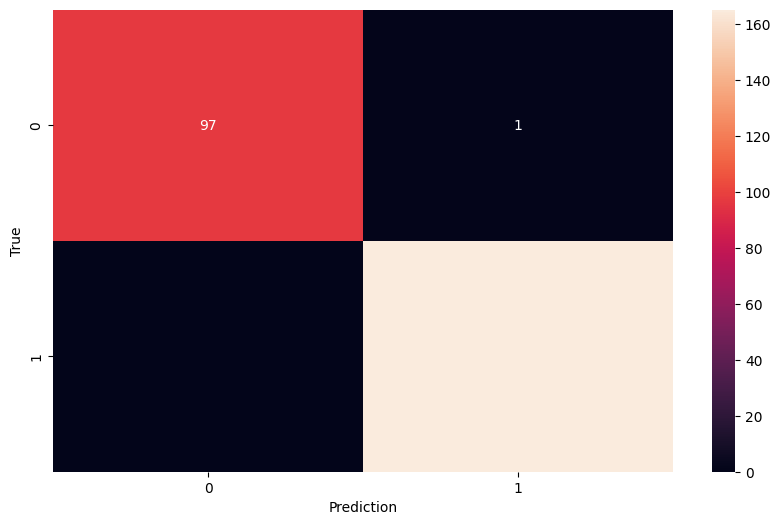

In [71]:
#seaborn es una biblioteca para hacer gráficos estadísticos
#Si tiene problemas para ejecutar seaborn ejecute la siguiente instruccion: pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Prediction')
plt.ylabel('True')

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 97   1]
 [  0 165]]

True Positives(TP) =  97

True Negatives(TN) =  165

False Positives(FP) =  1

False Negatives(FN) =  0


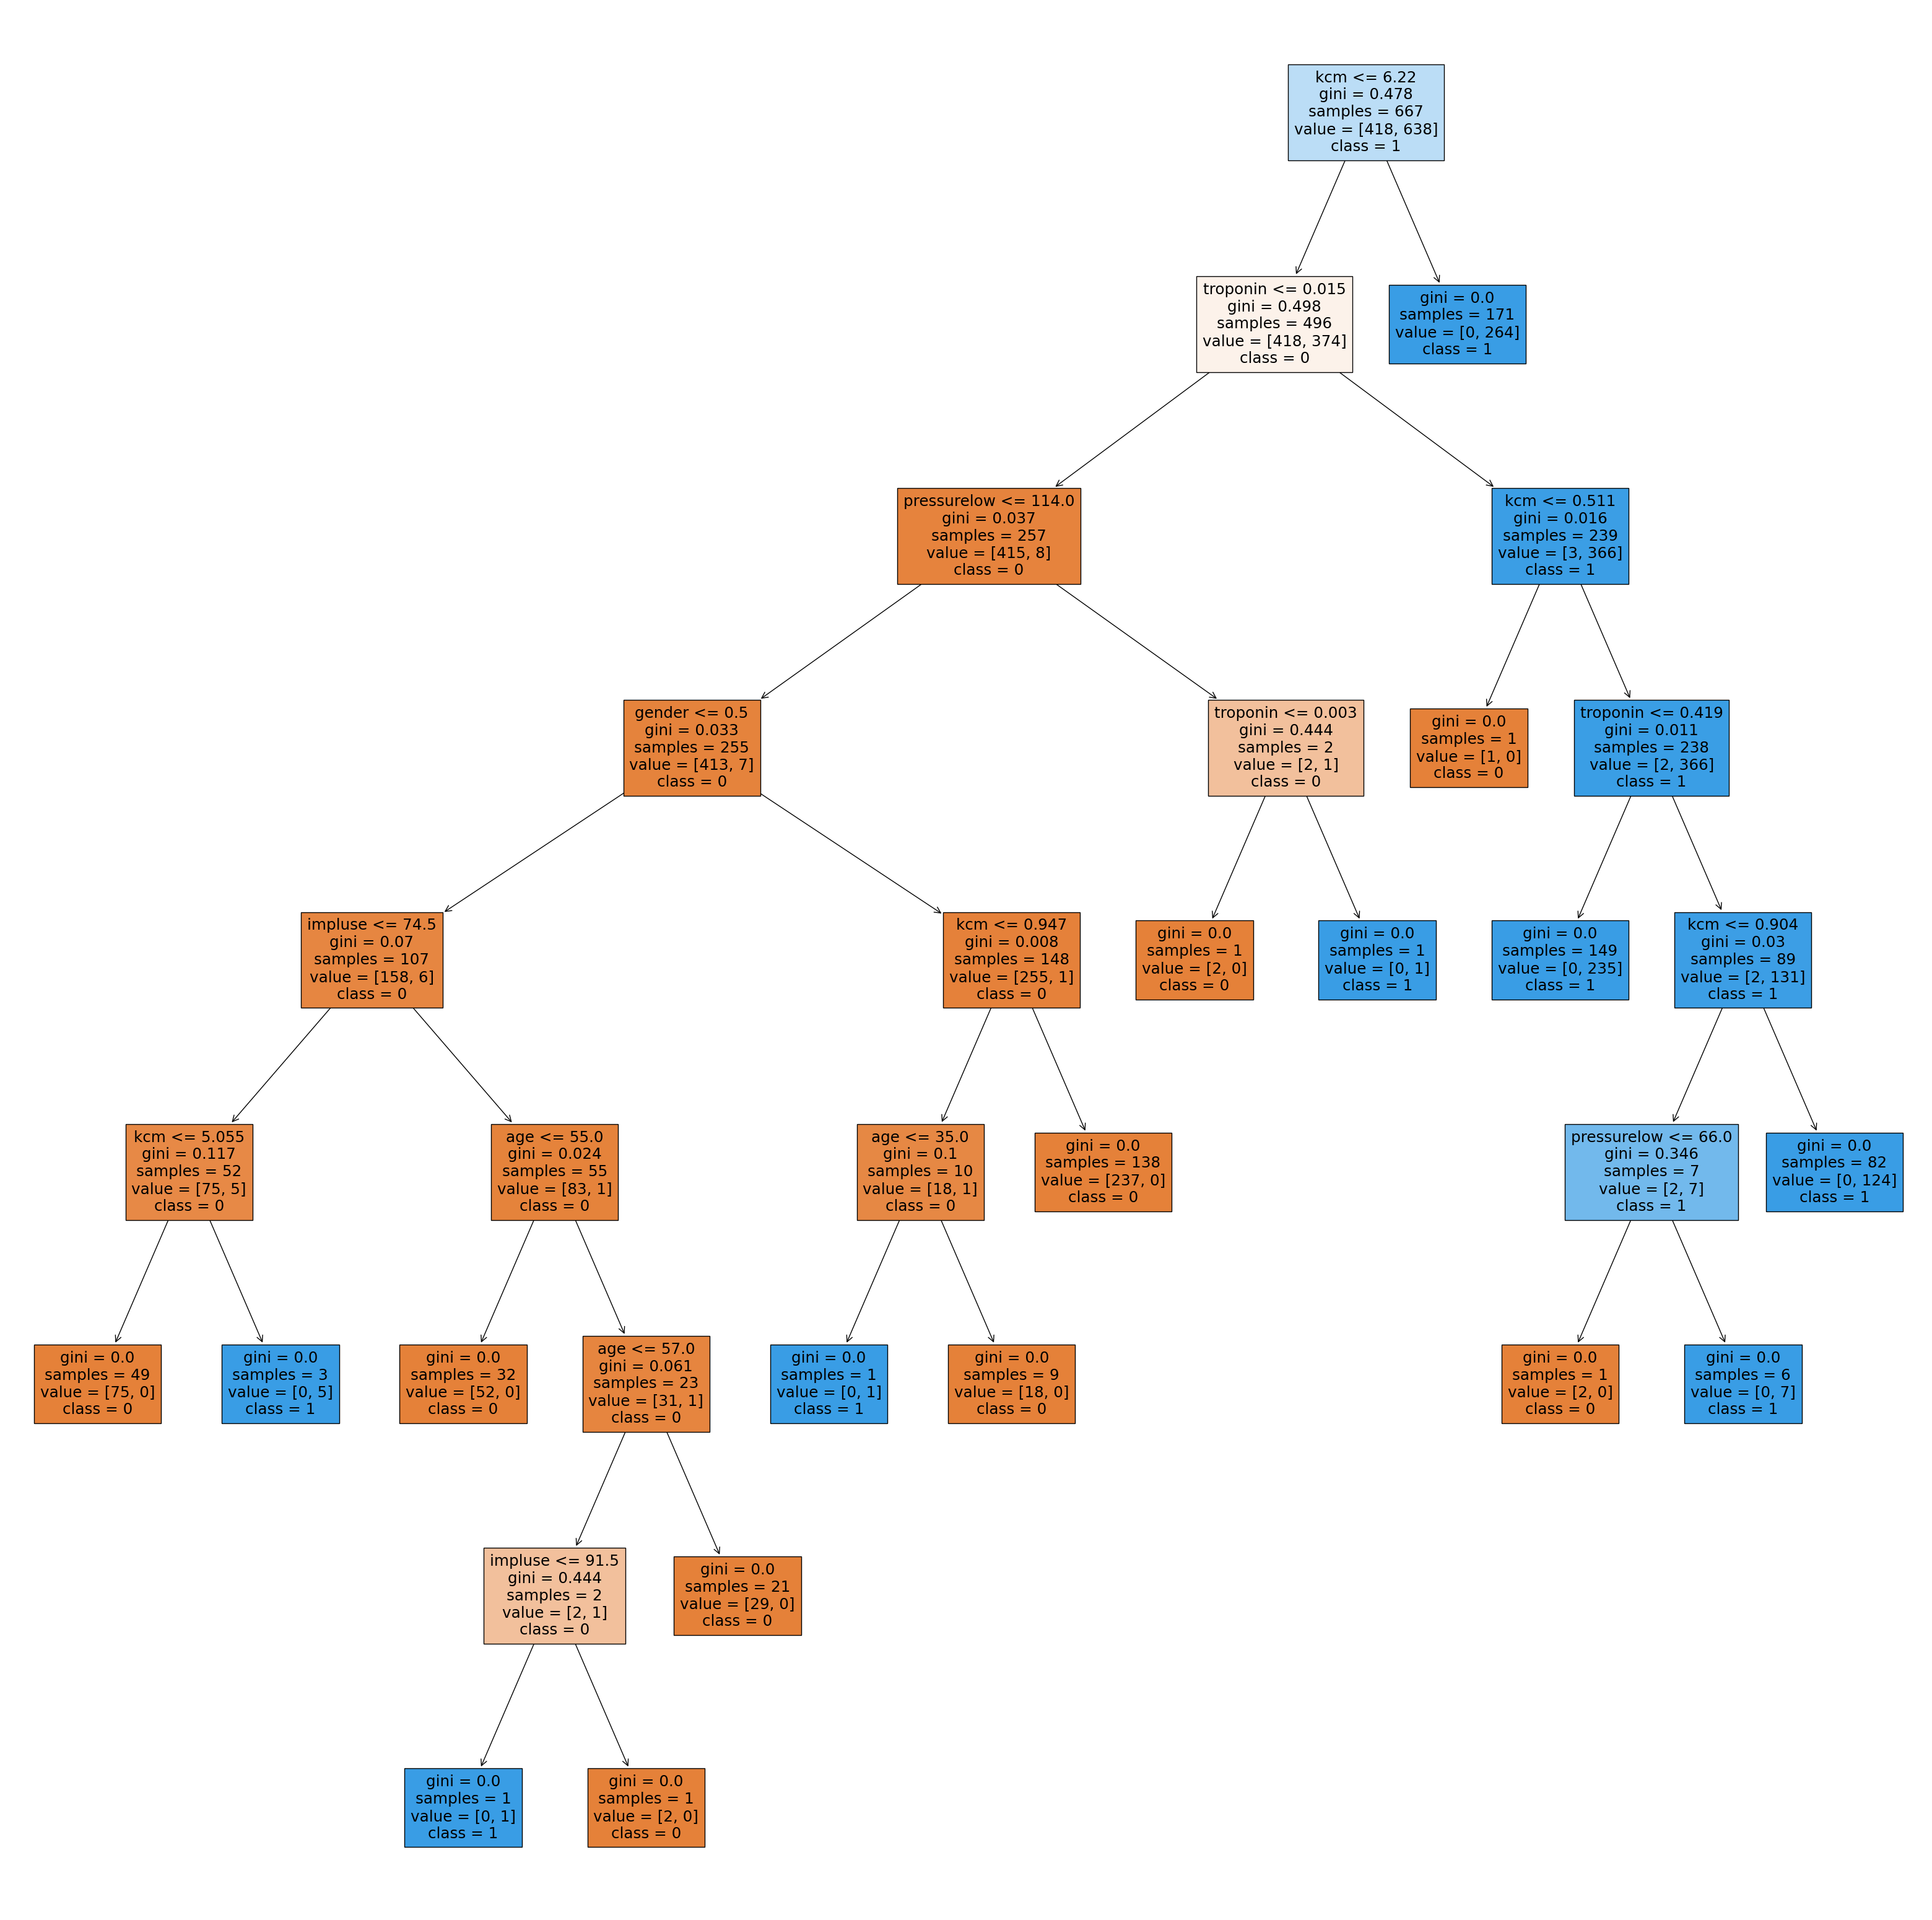

In [52]:
#Se viualiza de forma gráfica la estimación del bosque aleatorio mediante
#un árbol de decisión
from sklearn.tree import plot_tree
plt.figure(figsize=(40,40))
plot_tree(model.estimators_[3], feature_names = X_train.columns,class_names=["0", "1"],filled=True);

In [ ]:
%matplotlib inline
X_train.hist()

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       0.99      1.00      1.00       165

    accuracy                           1.00       263
   macro avg       1.00      0.99      1.00       263
weighted avg       1.00      1.00      1.00       263



In [57]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [58]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0038


In [59]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9898


In [60]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [61]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 1.0000


In [62]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0060


In [63]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9940


In [1]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_predicted)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

NameError: name 'y_test' is not defined

In [696]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_predicted)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 1.0000


In [697]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 1.0000


In [65]:
dfHeart.corr()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
age,1.000000,-0.092874,-0.023440,0.017441,0.002614,-0.004193,0.018419,0.088800,0.238097
gender,-0.092874,1.000000,-0.026781,0.011065,-0.009370,0.006668,0.017527,0.065793,0.094432
impluse,-0.023440,-0.026781,1.000000,0.010882,0.108353,-0.019584,-0.013001,0.011180,0.006920
pressurehight,0.017441,0.011065,0.010882,1.000000,0.586166,0.020807,-0.016396,0.043729,-0.020825
pressurelow,0.002614,-0.009370,0.108353,0.586166,1.000000,-0.025614,-0.023403,0.043360,-0.009659
glucose,-0.004193,0.006668,-0.019584,0.020807,-0.025614,1.000000,0.045757,0.021069,-0.033059
kcm,0.018419,0.017527,-0.013001,-0.016396,-0.023403,0.045757,1.000000,-0.016008,0.217720
troponin,0.088800,0.065793,0.011180,0.043729,0.043360,0.021069,-0.016008,1.000000,0.229376
class,0.238097,0.094432,0.006920,-0.020825,-0.009659,-0.033059,0.217720,0.229376,1.000000


                    age    gender   impluse  pressurehight  pressurelow  \
age            1.000000 -0.092874 -0.023440       0.017441     0.002614   
gender        -0.092874  1.000000 -0.026781       0.011065    -0.009370   
impluse       -0.023440 -0.026781  1.000000       0.010882     0.108353   
pressurehight  0.017441  0.011065  0.010882       1.000000     0.586166   
pressurelow    0.002614 -0.009370  0.108353       0.586166     1.000000   
glucose       -0.004193  0.006668 -0.019584       0.020807    -0.025614   
kcm            0.018419  0.017527 -0.013001      -0.016396    -0.023403   
troponin       0.088800  0.065793  0.011180       0.043729     0.043360   
class          0.238097  0.094432  0.006920      -0.020825    -0.009659   

                glucose       kcm  troponin     class  
age           -0.004193  0.018419  0.088800  0.238097  
gender         0.006668  0.017527  0.065793  0.094432  
impluse       -0.019584 -0.013001  0.011180  0.006920  
pressurehight  0.020807 -

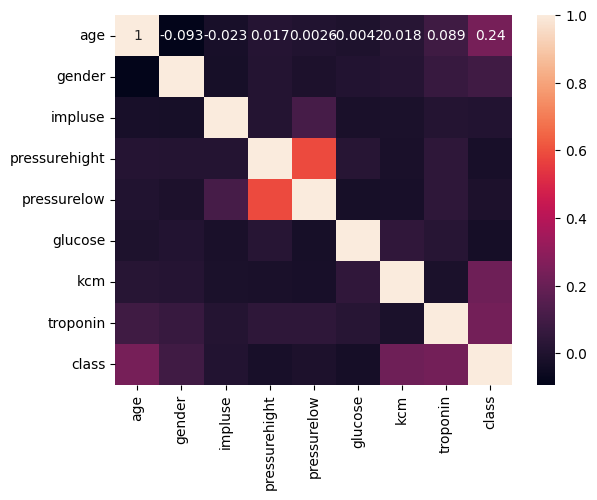

In [67]:
import seaborn as sn
correlation_matrix= dfHeart.corr()
print(correlation_matrix)
sn.heatmap(correlation_matrix, annot=True)
print('Matrix de correlacion')
plt.show()



In [69]:
import numpy as np
covMatrix=dfHeart.cov()
print (covMatrix)


                      age    gender      impluse  pressurehight  pressurelow  \
age            186.249220 -0.600817   -16.516058       6.217635     0.500688   
gender          -0.600817  0.224701    -0.655431       0.137020    -0.062333   
impluse        -16.516058 -0.655431  2665.684781      14.676981    78.510243   
pressurehight    6.217635  0.137020    14.676981     682.396524   214.891079   
pressurelow      0.500688 -0.062333    78.510243     214.891079   196.951027   
glucose         -4.287321  0.236814   -75.756562      40.724107   -26.932316   
kcm             11.645068  0.384889   -31.096925     -19.842202   -15.215777   
troponin         1.399203  0.036008     0.666438       1.318879     0.702568   
class            1.582422  0.021799     0.174005      -0.264926    -0.066014   

                   glucose          kcm  troponin     class  
age              -4.287321    11.645068  1.399203  1.582422  
gender            0.236814     0.384889  0.036008  0.021799  
impluse      

<Axes: >

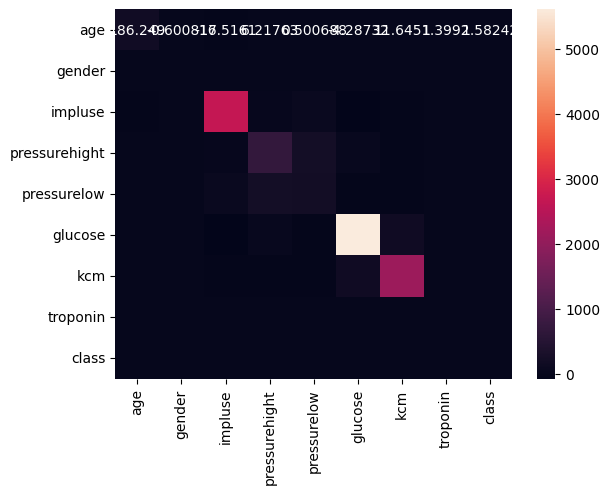

In [70]:
sn.heatmap(covMatrix, annot=True, fmt='g')

c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='src_port', ylabel='Density'>

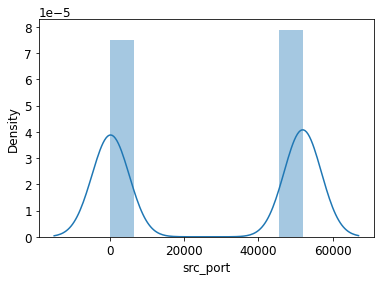

In [702]:
sn.distplot(dfNetwork['src_port'])


c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dst_port', ylabel='Density'>

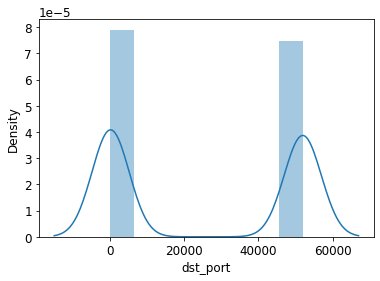

In [703]:
sn.distplot(dfNetwork['dst_port'])


c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target_traffic', ylabel='Density'>

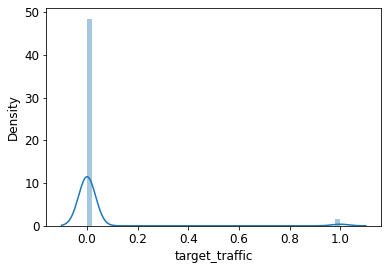

In [704]:
sn.distplot(dfNetwork['target_traffic'])


c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bidirectional_first_seen_ms', ylabel='Density'>

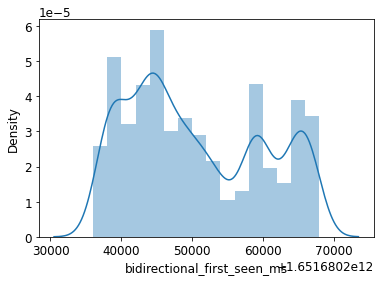

In [705]:
sn.distplot(dfNetwork['bidirectional_first_seen_ms'])


c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bidirectional_last_seen_ms', ylabel='Density'>

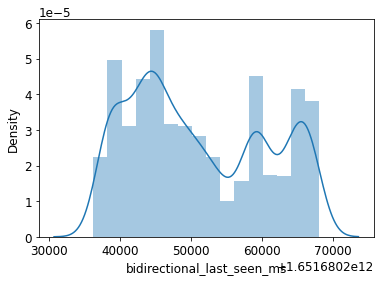

In [706]:
sn.distplot(dfNetwork['bidirectional_last_seen_ms'])


c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='size_traffic', ylabel='Density'>

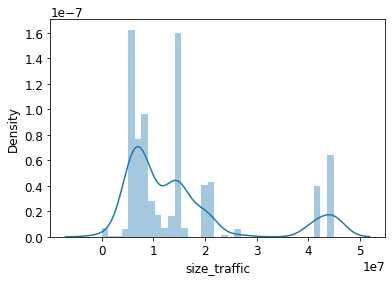

In [707]:
sn.distplot(dfNetwork['size_traffic'])


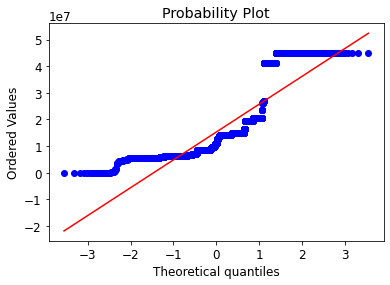

In [708]:
import pylab
import scipy.stats as stats

stats.probplot(dfNetwork['size_traffic'], dist="norm", plot=pylab)
pylab.show()

In [709]:
from scipy.stats import jarque_bera

result = (jarque_bera(dfNetwork['size_traffic']))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}")

JB statistic: 1684.7172418350128
p-value: 0.0


In [710]:
result = (jarque_bera(dfNetwork['size_traffic']))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}")

JB statistic: 1684.7172418350128
p-value: 0.0


In [715]:
from scipy.stats import shapiro

result = (shapiro(dfNetwork['size_traffic']))

print(f"S-W statistic: {result[0]}")
print(f"p-value: {result[1]}")

S-W statistic: 0.7450168132781982
p-value: 0.0
